In [5]:
pip install openpyxl

     |████████████████████████████████| 249 kB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/skyemalfoy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import re
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Learning
## 1.1 About
<p>The increased world population is among the fierce problems the world is facing right now and it will get uncontrolled in the coming future if proper steps for its betterment were not taken immediately. This world has observed the fastest growth during the 20th century. In the 1950s world population was 2.7 billion, By the end of this year it will cross 8 billion.
This dataset is uploaded with the assumption to use your Data Science, Machine learning, and Predictive analytics skills and answer the following questions.

Which countries have the highest growth rate.
What are the densely populated countries in the world.
Keeping in view all the variables in mind which countries should take serious steps to control their population.</p></n>

## 1.2 Name & category (guess)
1. Country name: This column includes names of 205 countries of the world. (str)
2. Current population: current population of the country. (int)
3. Population 2022: Population of the country in the previous year i.e. 2022 (int)
4. Area: Area of the country in kilometer square (km^2) (int)
5. Land area: Land of the country km^2. (float)
6. Density: This column shows the number of people living per square kilometer. (float)
7. Growth rate: Annual growth rate of the country. Where the +ve sign shows an increase in growth rate while the -ve 8. growth rate shows a decrease in growth rate. (float)
9. World percentage: the country has how much percentage of the world population. (float)
10. Rank: this last column shows the rank of the country in the world. (int)


# 2. Data Loading & Information Checking
<p>In this section, our main target is to discover about the dataset and do some processing to make this "complex" and disorder dataset to be in order and so we can make the analytics procedure easier. <br/>
    <b>We are going to discover and process the dataset from the following three big steps:</b> <br/>
1. Load data;<br/>
2. Check data type and missing data;<br/>
3. Data cleaning, which can be divided into:<br/>
    &nbsp;&nbsp;a. Columns dropping and missing data filling;<br/>
    &nbsp;&nbsp;b. Columns renaming;<br/>
    &nbsp;&nbsp;c. Numbers cleaning and types transferring;<br/>
    &nbsp;&nbsp;d. Showing description;<br/>
    &nbsp;&nbsp;e. Illogical columns reforming.<br/>

</p>

## 2.1 Load the data

In [29]:
df_raw = pd.read_excel("world_population2023.xlsx")
#Show it out.
df_raw

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...,...
200,200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


## 2.2 Check the type and missing data of dataset

In [30]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          205 non-null    int64 
 1   country name        205 non-null    object
 2   current population  205 non-null    object
 3   population 2022     205 non-null    object
 4   area                205 non-null    object
 5   land area           205 non-null    object
 6   density             205 non-null    object
 7   growth rate         205 non-null    object
 8   world percentage    204 non-null    object
 9   rank                205 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.1+ KB


### Information get from this dataset:

1. There are 205 rows and 10 columns in total;
2. Column "world percentage" has one missing data</b>
3. And also, the types of data are not the same as we guessed in the first glance - only column "rank" has data with ‘int’ type.

## 2.3 Data Cleaning


In [31]:
# The first column seems useless in this case, so we perfer to drop it.
df_raw.drop("Unnamed: 0", axis=1, inplace=True)
# View of the current dataset.
df_raw

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [5]:
# Rename all columns
df_raw = df_raw.rename(columns={
    "country name": "Name",
    "current population": "Population_23",
    "population 2022": "Population_22",
    "area": "Area_all",
    "land area": "Area_land",
    "density": "Density",
    "growth rate": "Growth_rate",
    "world percentage": "Ratio",
    "rank": "Rank"
})

In [6]:
#Assign a proper figure to the missing data.
df_raw.iloc[-1, -2] = "0.00%"
df_raw

,Name,Population_23,Population_22,Area_all,Area_land,Density,Growth_rate,Ratio,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [7]:
#Numbers cleaning and types changes
df_raw['Population_23'] = df_raw['Population_23'].str.replace(',', '')
df_raw['Population_23'] = df_raw['Population_23'].astype(int)
df_raw['Population_22'] = df_raw['Population_22'].str.replace(',', '')
df_raw['Population_22'] = df_raw['Population_22'].astype(int)
df_raw['Density'] = df_raw['Density'].str.replace(',', '')
df_raw['Density'] = df_raw['Density'].astype(float)
df_raw['Growth_rate'] = df_raw['Growth_rate'].str.replace('%', '')
df_raw['Growth_rate'] = df_raw['Growth_rate'].astype(float)
df_raw['Ratio'] = df_raw['Ratio'].str.replace('%', '')
df_raw['Ratio'] = df_raw['Ratio'].astype(float)

df_raw['Area_all'] = df_raw['Area_all'].apply(lambda x : re.sub('M','000000',x))
df_raw['Area_all'] = df_raw['Area_all'].apply(lambda x : re.sub('K','000',x))
df_raw['Area_all'] = df_raw['Area_all'].str.replace('.', '')
df_raw.loc[204, 'Area_all'] = 0.5
df_raw['Area_all'] = df_raw['Area_all'].astype(float)
df_raw['Area_land'] = df_raw['Area_land'].apply(lambda x : re.sub('M','000000',x))
df_raw['Area_land'] = df_raw['Area_land'].apply(lambda x : re.sub('K','000',x))
df_raw['Area_land'] = df_raw['Area_land'].str.replace('.', '')
df_raw.loc[204, 'Area_land'] = 0.5
df_raw['Area_land'] = df_raw['Area_land'].astype(float)


/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_8722/3725534377.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_raw['Area_all'] = df_raw['Area_all'].str.replace('.', '')
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_8722/3725534377.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_raw['Area_land'] = df_raw['Area_land'].str.replace('.', '')


In [17]:
# An overview of all numerical columns
df_raw[['Population_23', 'Population_22', "Area_all", "Area_land", "Density", "Growth_rate", "Ratio"]].describe()

,Population_23,Population_22,Area_all,Area_land,Growth_rate,Ratio
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,205.000000
mean,3.907452e+07,3.888173e+07,5.801160e+06,5.589960e+06,1.064878,0.490146
std,1.458696e+08,1.455222e+08,1.752976e+07,1.689445e+07,1.277604,1.826207
min,5.180000e+02,5.100000e+02,5.000000e-01,5.000000e-01,-7.450000,0.000000
25%,1.480242e+06,1.472233e+06,1.380000e+05,1.220000e+05,0.310000,0.020000
50%,7.590327e+06,7.529475e+06,7.890000e+05,8.880000e+05,0.890000,0.100000
75%,2.857019e+07,2.816054e+07,4.068000e+06,4.104000e+06,1.920000,0.360000
max,1.425820e+09,1.425887e+09,1.710000e+08,1.640000e+08,4.980000,17.850000


In [8]:
#Rerank the 'rank' column according to the index
df_raw["Rank"] = df_raw.index
df_raw

,Name,Population_23,Population_22,Area_all,Area_land,Density,Growth_rate,Ratio,Rank
0,India,1423118510,1417173173,33000000.0,3000000.0,481.0,0.81,17.85,0
1,China,1425820141,1425887337,97000000.0,94000000.0,151.0,-0.02,17.81,1
2,United States,339231549,338289857,94000000.0,91000000.0,37.0,0.50,4.25,2
3,Indonesia,276576867,275501339,19000000.0,19000000.0,148.0,0.74,3.47,3
4,Pakistan,238517163,235824862,8819000.0,7709000.0,312.0,1.98,3.00,4
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61.0,60.0,561.0,-0.05,0.00,200
201,Palau,18058,18055,459.0,460.0,39.0,0.02,0.00,201
202,Nauru,12780,12668,21.0,20.0,639.0,0.88,0.00,202
203,Tuvalu,11396,11312,26.0,30.0,380.0,0.74,0.00,203


# 3. Data Visualization & Analytics
<p>After processing the dataset, we will start to do some data visualisation to the dataset, by using the common data visualisation libraries in Python: Numpy, Pandas, Matplotlib and seaborn. <br/>
    <b>Our visualisation will be departed into these parts:</b> <br/>
    1. Bar plots for analysing the population in 2022 and 2023 for TOP 10 and Last 10 countries;(Panda.plot.bar) <br/>
    2. Bar plots for analysing of growing rates for Top 10 and Last 10 countries; (Seaborn) <br/>
    3. Numberical features' correlation analysis; <br/>
    4. Pie charts to analyse countries' area; <br/>
    5. Combined charts to analyse countries' density data; <br/>
</p>

## 3.1 Population analysis
<p>Two double bar charts to illustrate the population changes between 2022 and 2023 for Top 10 and Last 10 countries.</p>

<Figure size 1080x576 with 0 Axes>

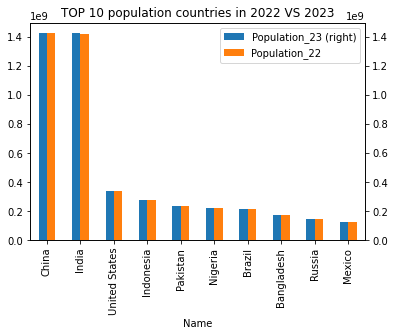

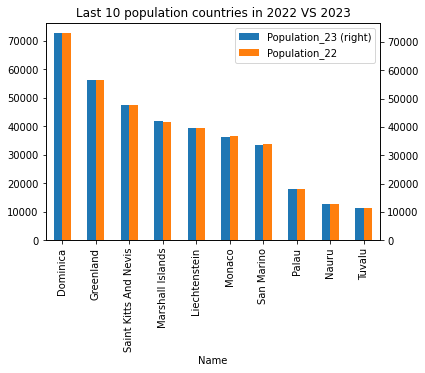

In [9]:
# Population double bar graphs in 2022 and 2023 for TOP 10 and Last 10 countries 

# Top 10 and Top last 10
df_pop_23 = df_raw[['Name', 'Population_23']].sort_values(by = ['Population_23'], ascending= False)
df_pop_22 = df_raw[['Name', 'Population_22']]
df_pop_com = pd.merge(df_pop_23, 
                      df_pop_22, 
                      on ='Name', 
                      how ='inner')

# Top 10 and top last 10 population
# Bar graph
plt.figure(figsize=(15, 8))
# plt.bar(height = df_pop_23['Population_23'][0:5], x = df_pop_23['Name'][0:5])
df_pop_com[0:10].plot(x = 'Name', secondary_y = 'Population_23', kind='bar', title='TOP 10 population countries in 2022 VS 2023')
df_pop_com[-11:-1].plot(x = 'Name', secondary_y = 'Population_23', kind='bar', title='Last 10 population countries in 2022 VS 2023')
plt.show()

## 3.2 Growth rate analysis
<p>Two bar graphs to present the growth rates for top 10 and last 10 countries(ranked by growth rate)</p>

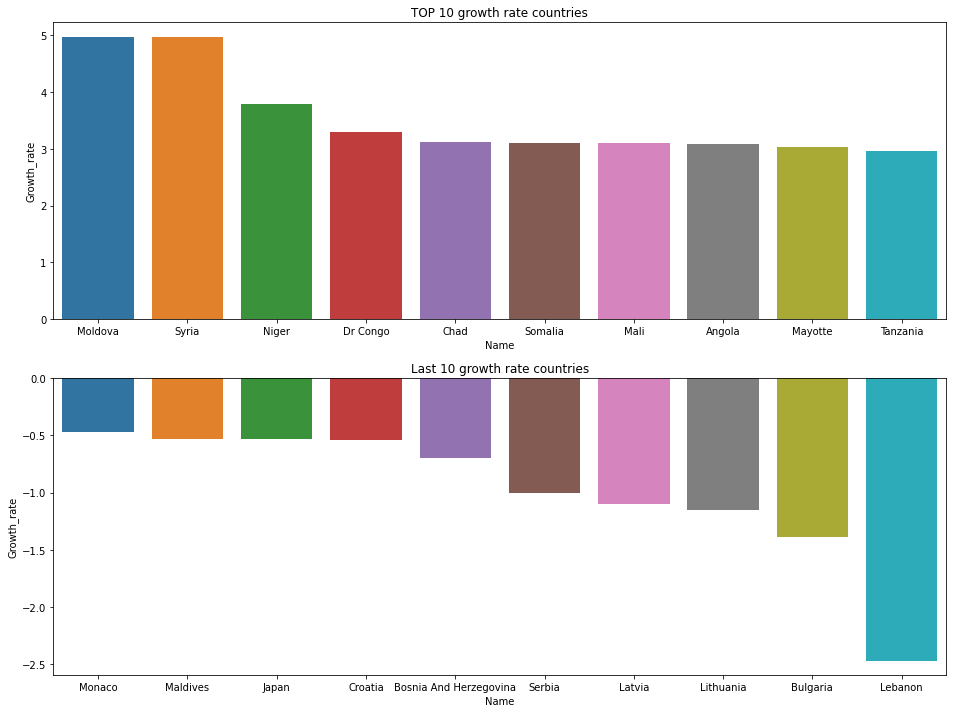

In [10]:
#Analysis of growing rates for Top 10 and Last 10 countries.

#Top 10 and last 10
df_GR = df_raw[['Name', "Growth_rate"]].sort_values(by='Growth_rate', ascending=False)

plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.title('TOP 10 growth rate countries')
#Rrawing by sns.barplot
sns.barplot(data=df_GR[0:10], x="Name", y="Growth_rate")
#Rrawing by pd.plot.bar
# df_raw[0:10].plot(x='Name', y='Growth_rate', kind='bar', color=np.where(df_raw['Growth_rate'][0:10]>0,'b','r'))
plt.subplot(212)
plt.title('Last 10 growth rate countries')
#Rrawing by sns.barplot
sns.barplot(data=df_GR[-11:-1], x="Name", y="Growth_rate")
#Rrawing by pd.plot.bar
# df_raw[0:10].plot(x='Name', y='Growth_rate', kind='bar', color=np.where(df_raw['Growth_rate'][0:10]>0,'b','r'))
plt.show()

## 3.3 Correlation analysis
<p>Presenting a heatmap to illustrate the correlation between numerical features.</p>

<AxesSubplot:>

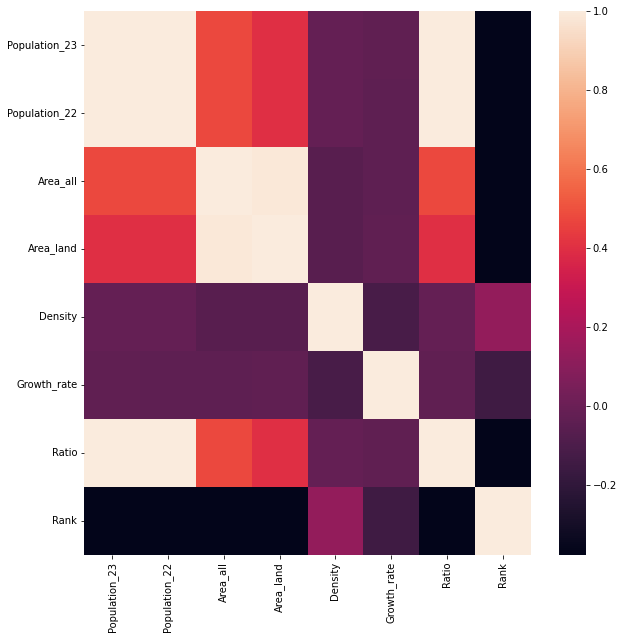

In [11]:
# Correlation analysis

# Correlations between columns
df_corr = df_raw.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df_corr)

<b>In this heatmap, we can clearly see that:</b>
<li>The higher the correlation is, the light the color has.</li>
<li>Every column and itself has the correlation of 1.00.</li>
<li>The populations in 2022 and 2023 are highly correlated.</li>
<li>The Rank of the country nearly has no correlation with all features.</li>
<li>The Area(whether entire country or land) counts to some extents for the ratio of countries' population out of the whole population in the world.</li>

## 3.4 Countries' area analysis
<p>Bar charts to present different kind of area for biggest 5 countries (Total area, land area and non-land area) </p>

In [13]:
#processing data
#Create a new dataframe for storing the 'Name', "Area_all" and "Area_land" columns.
df_area_all = df_raw[['Name', 'Area_all', 'Area_land']].sort_values(by='Area_all', ascending= False)
#Create a new column for storing the 'Non land area' for every country.
df_area_all['Area_non_land'] = df_area_all['Area_all'] - df_area_all['Area_land']
#Select only when 'Non land area' is 0 or positive number.
df_area_all = df_area_all[df_area_all['Area_non_land']>0].rename(index = df_area_all.iloc[:,0])

array([<AxesSubplot:title={'center':'Ratio of total area for TOP 5 countries'}, ylabel='Area_all'>,
       <AxesSubplot:title={'center':'Ratio of land area for TOP 5 countries'}, ylabel='Area_land'>,
       <AxesSubplot:title={'center':'Ratio of non-land area for TOP 5 countries'}, ylabel='Area_non_land'>],
      dtype=object)

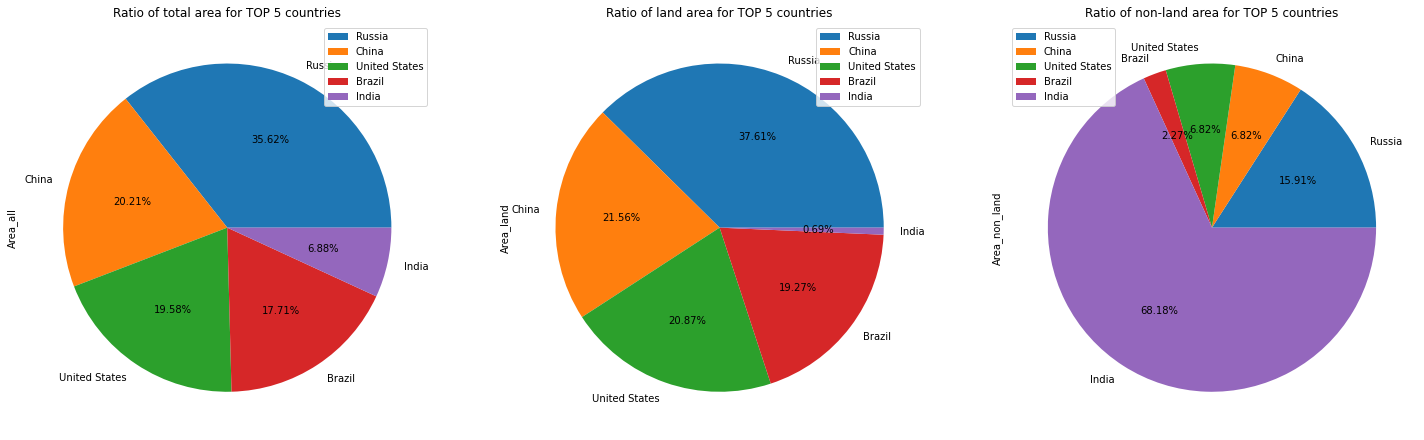

In [14]:
#Pie chart of different kind of area for biggest 5 countries (Total area, land area and non-land area)
df_area_all.iloc[0:5, 1:].plot.pie(figsize=(25, 25), subplots=True, label='Name', autopct='%.2f%%', title=['Ratio of total area for TOP 5 countries','Ratio of land area for TOP 5 countries','Ratio of non-land area for TOP 5 countries'])

## 3.5 Population density analysis
<p><b>We define population density for 4 levels:</b>
    <ol>1. &gt; 100/km<sup>2</sup> -- Intensive area/country;</ol>
    <ol>2. 25～100/km<sup>2</sup> -- Middle intensive area/country;</ol>
    <ol>3. 1～25人/km<sup>2</sup> -- Less intensive area/country;</ol>
    <ol>4. &lt; 1/km<sup>2</sup> extremely sparsely populated areas/country.</ol>
    </p>

In [15]:
'''We utilize library numpy with (np.where) to name sections according to the number itself with the rule 
mentioned before.'''

df_raw['Density'] = np.where(df_raw['Density'] > 100, 'Intensive', 
                             np.where((df_raw['Density'] > 25)&(df_raw['Density'] <= 100), 'Middle Intensive',
                            np.where((df_raw['Density'] > 1)&(df_raw['Density'] <= 25), 'Less Intensive',
                            'Extremely sparsely'
                            )))
df_raw

,Name,Population_23,Population_22,Area_all,Area_land,Density,Growth_rate,Ratio,Rank
0,India,1423118510,1417173173,33000000.0,3000000.0,Intensive,0.81,17.85,0
1,China,1425820141,1425887337,97000000.0,94000000.0,Intensive,-0.02,17.81,1
2,United States,339231549,338289857,94000000.0,91000000.0,Middle Intensive,0.50,4.25,2
3,Indonesia,276576867,275501339,19000000.0,19000000.0,Intensive,0.74,3.47,3
4,Pakistan,238517163,235824862,8819000.0,7709000.0,Intensive,1.98,3.00,4
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61.0,60.0,Intensive,-0.05,0.00,200
201,Palau,18058,18055,459.0,460.0,Middle Intensive,0.02,0.00,201
202,Nauru,12780,12668,21.0,20.0,Intensive,0.88,0.00,202
203,Tuvalu,11396,11312,26.0,30.0,Intensive,0.74,0.00,203


<b>After transfering, we can see that the density feature has transfer in categorical data.</b>

<b>Then, we start to draw a combined graph:</b>
<li> A bar graph shows the frequency of each category.</li>
<li> A pie chart shows the ratio of the frequency of each category.</li>

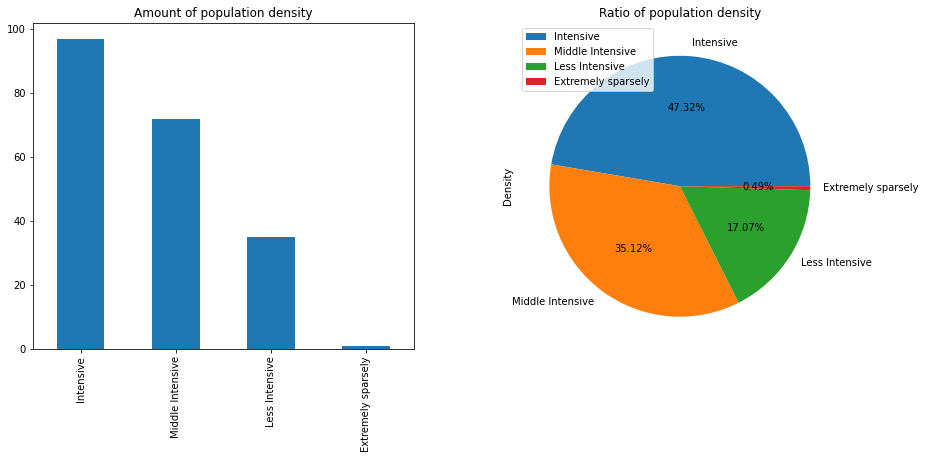

In [16]:
labels = df_raw['Density'].value_counts().values
plt.figure(figsize=(15,6))
plt.subplot(121)
df_raw['Density'].value_counts().plot.bar(title='Amount of population density')
plt.subplot(122)
df_raw['Density'].value_counts().plot.pie(autopct='%.2f%%',title='Ratio of population density')
plt.legend(loc='upper left')
plt.show()

# 4. Recap & Summary
<p>In this report, we discovered some facts and relationship between the data for the dataset which indicates the population related information for countries worldwide. Meanwhile, we divided the procedure into 3 parts:
    <li>Data loading and checking;</li>
<li>Data Processing;</li>
<li>Data Visualisation;</li> <br/>
    <b>Following facts are concluded with the help of statistical and graphical analyis:</b>
    <li>China and India stands the top2 population around the world, whose population are both higher than 1 billion, but only India's population is increasing continously.</li>
    <li>Neither of the Top 10 population countries have the top 10 growth rate. On the contrary, there are few countries in the Last 10 population but still in the Last 10 growth rate.</li>
    <li>We amazingly to find that there has only a slight relationship between all the other features and rank of the country.</li>
    <li>In the Top 5 area countries, India is the smallest but it has the largest area for non-land.</li>
    <li>It is also amazing to see that the area(whether entire area or land area) has only a small relationship with the density.</li>
    <li>With the help of the previous discovery, we also find that nearly half(47.32%) of the countries on the list area considered as "Intensive" for density (> 100/km2 -- Intensive area/country).</li> <br/>

<b>There are definetely more information could be discovered instead of the ones presented in this report, if you could offer me with some new ideas. I would like to appreciate them!</b> 
</p>

# 5. Bibliography and acknowledge
1.Dataset:<br>
https://www.kaggle.com/datasets/dinarkhan/worldpopulation2023 <br><br>
2.Analysis tools' tutorial<br>
https://numpy.org/doc/stable/user/whatisnumpy.html'<br>
https://pandas.pydata.org/docs/user_guide/10min.html'<br>
https://matplotlib.org/stable/tutorials/index.html'<br>
https://seaborn.pydata.org/tutorial.html'<br><br>
3.Analysis struture<br>
https://www.kaggle.com/code/surobhipal/world-population-2023-exploratory-data-analysis

<h2>About the Author(s):</h2> 

<a href="https://www.linkedin.com/in/haozhetang/">Haozhe TANG</a> is now studying in a dual master program between <a href = 'https://www.epita.fr/en/homepage/'>EPITA</a> and <a href="https://www.em-normandie.com/fr">EM Normandie</a> with the program of "Artificial Intelligence for Marketing Strategy", who has also participated in <a href = 'https://scholar.google.com/citations?hl=en&tzom=-60&user=ucWiH1MAAAAJ'>six</a> paper writing and researching.


## <h3 align="center"> © Haozhe TANG 03.2023. All rights reserved. <h3/>